In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

In [2]:
data= pd.read_csv('../input/electronics/electronics.csv')
data

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [3]:
data.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [4]:
data['brand']=data.drop(['brand'],axis=1)
data['user_attr']=data.drop(['user_attr'],axis=1)
data.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

<AxesSubplot:>

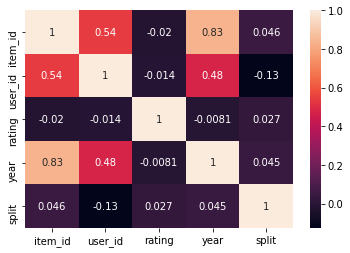

In [5]:
sn.heatmap(data.corr(),annot=True)

In [6]:
pd.get_dummies(data[["model_attr"]]).head()

,model_attr_Female,model_attr_Female&Male,model_attr_Male
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
pd.get_dummies(data[['category']]).head()

,category_Accessories & Supplies,category_Camera & Photo,category_Car Electronics & GPS,category_Computers & Accessories,category_Headphones,category_Home Audio,category_Portable Audio & Video,category_Security & Surveillance,category_Television & Video,category_Wearable Technology
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [8]:
data_elec= pd.concat([pd.get_dummies(data[["model_attr"]]),pd.get_dummies(data[["category"]]),data['item_id'],data['user_id'],data['rating'],data['year']],axis=1)
data_elec

,model_attr_Female,model_attr_Female&Male,model_attr_Male,category_Accessories & Supplies,category_Camera & Photo,category_Car Electronics & GPS,category_Computers & Accessories,category_Headphones,category_Home Audio,category_Portable Audio & Video,category_Security & Surveillance,category_Television & Video,category_Wearable Technology,item_id,user_id,rating,year
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.0,1999
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,5.0,1999
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3.0,1999
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1.0,1999
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4,2.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292949,1,0,0,0,0,0,0,1,0,0,0,0,0,9478,1157628,1.0,2017
1292950,1,0,0,0,0,0,1,0,0,0,0,0,0,9435,1157629,5.0,2017
1292951,1,0,0,0,0,0,1,0,0,0,0,0,0,9305,1157630,3.0,2016
1292952,0,0,1,0,0,0,0,1,0,0,0,0,0,9303,1157631,5.0,2018


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
min_max_scaler = MinMaxScaler()
data_elec = min_max_scaler.fit_transform(data_elec)

In [11]:
np.round(data_elec,2)

array([[1.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.5 , 0.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 1.  , 0.5 , 0.89],
       [0.  , 0.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.95]])

# **Using KNN algorithm to find our prediction**

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='auto').fit(data_elec)

In [14]:
distances, indices = nbrs.kneighbors(data_elec)

In [15]:
distances

array([[0.00000000e+00, 8.63832375e-07, 5.18299425e-06, 7.77449138e-06,
        1.03659885e-05, 1.12298209e-05],
       [0.00000000e+00, 8.63832375e-07, 4.31916188e-06, 6.91065900e-06,
        9.50215613e-06, 1.03659885e-05],
       [0.00000000e+00, 1.46851504e-05, 1.81404799e-05, 2.59149713e-05,
        5.09661101e-05, 5.26937749e-05],
       ...,
       [0.00000000e+00, 1.01519472e-02, 1.06116397e-02, 1.07003431e-02,
        1.12514754e-02, 1.45822766e-02],
       [0.00000000e+00, 3.31993036e-03, 8.65128124e-03, 1.31562904e-02,
        1.43625434e-02, 1.64332873e-02],
       [0.00000000e+00, 3.45532950e-06, 4.23277864e-05, 4.56103494e-04,
        1.78640535e-03, 2.39886251e-03]])

In [16]:
indices

array([[      0,       1,       6,       9,      12,      13],
       [      1,       0,       6,       9,      12,      13],
       [      2,      19,      23,      32,      61,      63],
       ...,
       [1292951, 1282283, 1279282, 1290793, 1278453, 1274051],
       [1292952, 1288976, 1281825, 1276352, 1276137, 1271661],
       [1292953, 1292949, 1292902, 1292361, 1290674, 1289889]])

In [17]:
def get_index_from_name(name):
    return data[data["category"]==name].index.tolist()[0]

In [18]:
get_index_from_name('Portable Audio & Video')

0

In [19]:
indices[0][1:]

array([ 1,  6,  9, 12, 13])

In [20]:
data.iloc[indices[0][1:],:]['user_id']

1      1
6      6
9      9
12    12
13    13
Name: user_id, dtype: int64

In [21]:
def print_similar_names(user_id=None):
     if user_id:
        found_id = get_index_from_name(user_id)
        for id in indices[found_id][1:]:
            print(data.iloc[id]["user_id"],'[','User ID =',data.iloc[id]["model_attr"],',','Category =',data.iloc[id]["category"],']')

# prediction by user_id

In [22]:
#print_similar_names(input('user_id=')) # prediction by user_id